In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import os

In [ ]:
import warnings
from pylab import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 18, 6

# yashu

In [ ]:
!pip install pmdarima

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pmdarima import auto_arima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/yashu_btp/Posoco Data Analysis.xlsx", sheet_name="Total Load Data")

In [ ]:
df.head()

,Date,Days,NR,WR,SR,ER,NER,TOTAL
0,2012-04-01,2012-04-01,32607,34443,28350,12405,1458,109263
1,2012-04-02,2012-04-02,31560,36568,28913,13992,1539,112572
2,2012-04-03,2012-04-03,33345,36355,27958,13857,1549,113064
3,2012-04-04,2012-04-04,33026,36530,28956,13886,1530,113928
4,2012-04-05,2012-04-05,32982,35964,30468,13510,1532,114456


In [ ]:
new_df = df[['Date', 'NR']].copy()
new_df.set_index('Date', inplace=True)

In [ ]:
print(new_df)

               NR
Date             
2012-04-01  32607
2012-04-02  31560
2012-04-03  33345
2012-04-04  33026
2012-04-05  32982
...           ...
2021-12-27  53645
2021-12-28  50901
2021-12-29  52602
2021-12-30  53041
2021-12-31  53319

[3532 rows x 1 columns]


In [ ]:
new_df = new_df.fillna(new_df.bfill())# The term bfill means that we use the value before filling in missing values
new_df.head()

,NR
Date,
2012-04-01,32607
2012-04-02,31560
2012-04-03,33345
2012-04-04,33026
2012-04-05,32982


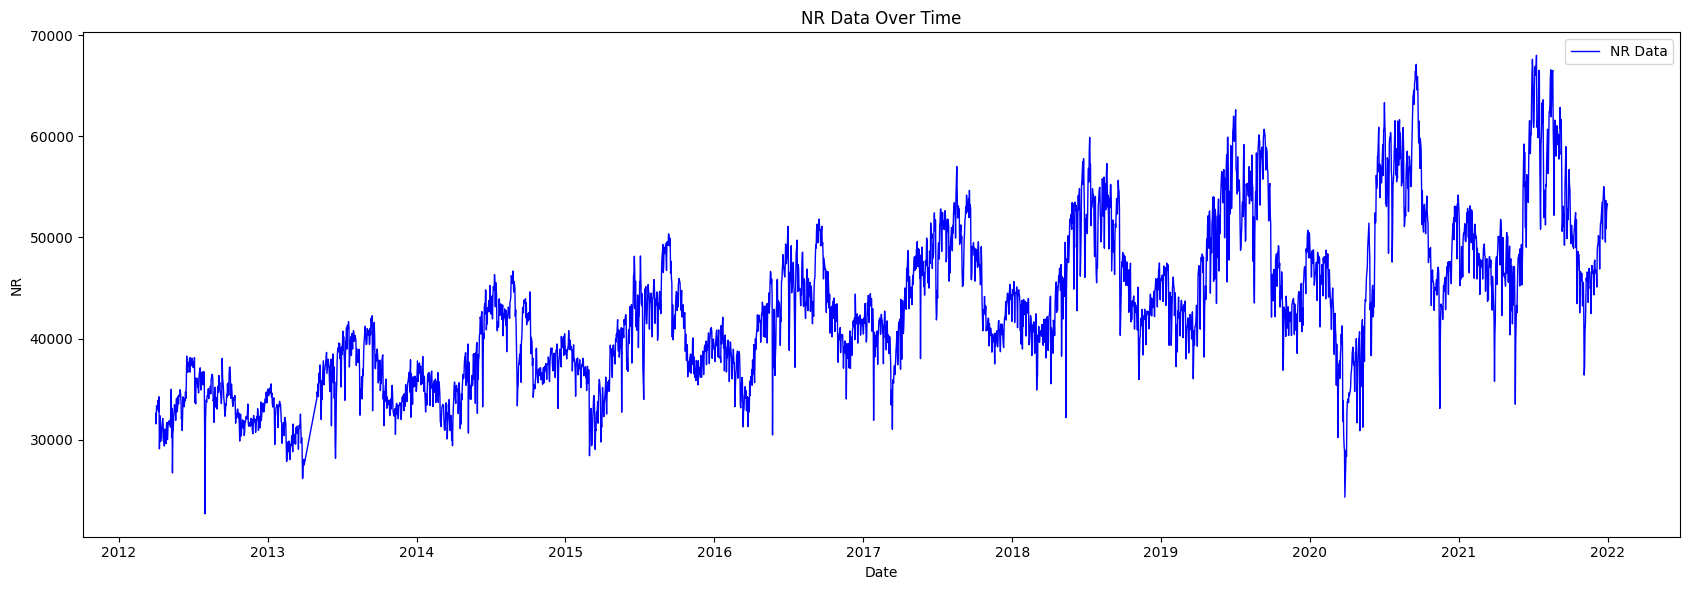

In [ ]:


# Assuming new_df contains your data with 'Date' and 'NR' columns

# Plotting the data
plt.figure(figsize=(17, 6))  # Set the figure size (optional)
plt.plot(new_df['NR'],linewidth=1, color='b', label='NR Data')
plt.xlabel('Date')
plt.ylabel('NR')
plt.title('NR Data Over Time')
plt.legend()
#plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility (optional)
plt.tight_layout()  # Adjust layout for better appearance (optional)
plt.show()

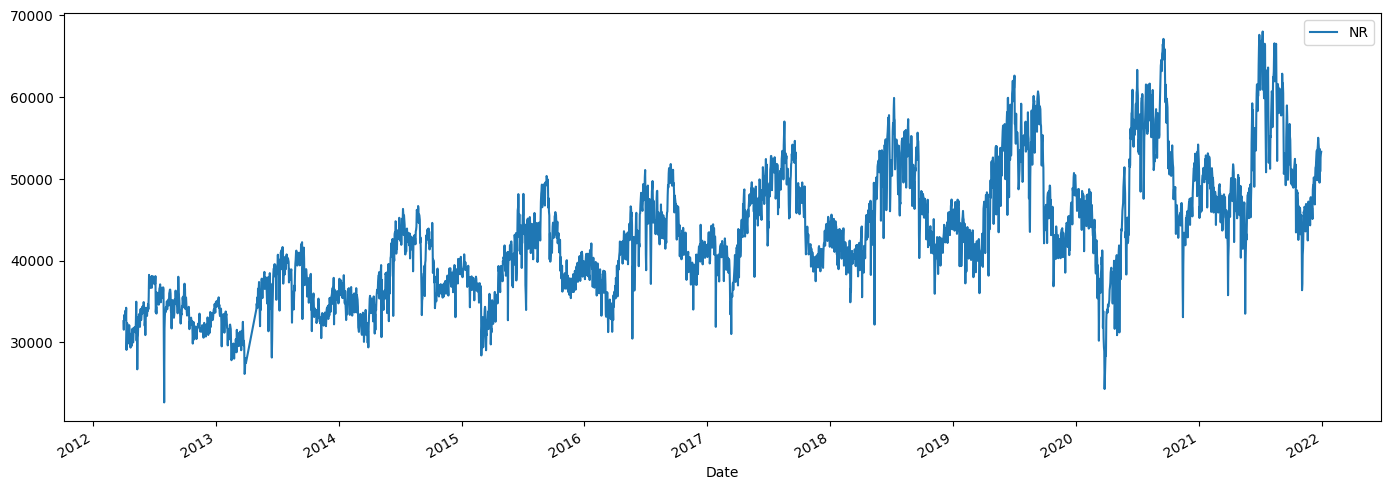

In [ ]:
#time series e as a data visualization
new_df.plot(figsize=(17, 6))
plt.show()

**ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.**

There are three distinct integers (p, d, q) that are used to parametriz

* p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

* d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

* q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s.

**Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series.**

# grid search

In [ ]:
import itertools
import statsmodels.api as sm
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
print(pdq)
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [ ]:
warnings.filterwarnings('ignore')
AIC = []
parm_ = []
parm_s = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            AIC.append(results.aic)
            parm_.append(param)
            parm_s.append(param_seasonal)

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:85481.15025900595
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:82861.80495055564
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:66976.63460866924
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:66284.27700894936
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:66993.46193926263
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:66413.22917484463
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:66394.89580605963
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:66280.83548422226
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:82879.91139407197
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:82121.47079104386
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:66017.59972438717
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:65185.816968527324
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:81896.24114114392
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:65166.98692963201
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:65388.22946251403
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:65183.99783037107
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:64279.065697378624
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:64200.712019106846
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:66829.39

In [ ]:
min(AIC)

63762.17956772748

In [ ]:
pos = AIC.index(min(AIC))

print('p,d,q : {} , P,D,Q,M : {}'.format(parm_[pos],parm_s[pos]))


p,d,q : (1, 1, 1) , P,D,Q,M : (1, 0, 1, 4)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(new_df,
                                order=parm_[pos],
                                seasonal_order=parm_s[pos],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4216      0.029     14.629      0.000       0.365       0.478
ma.L1         -0.7427      0.025    -29.966      0.000      -0.791      -0.694
ar.S.L4        0.4388      0.115      3.801      0.000       0.213       0.665
ma.S.L4       -0.5084      0.109     -4.648      0.000      -0.723      -0.294
sigma2      4.337e+06   6.01e+04     72.146      0.000    4.22e+06    4.46e+06


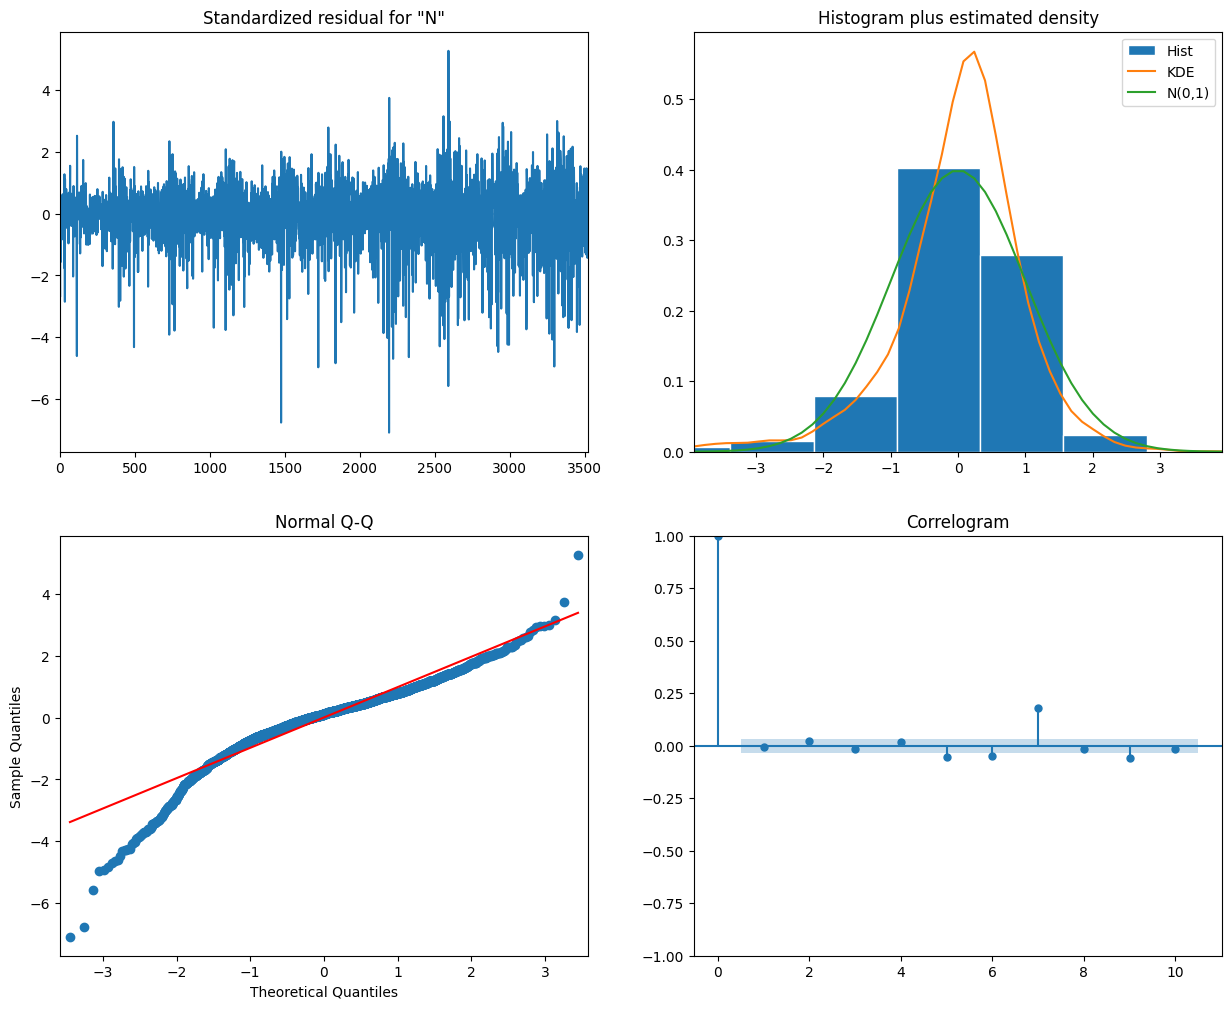

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                NR   No. Observations:                 3532
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 4)   Log Likelihood              -31876.090
Date:                           Fri, 10 Nov 2023   AIC                          63762.180
Time:                                   09:12:05   BIC                          63793.018
Sample:                                        0   HQIC                         63773.181
                                          - 3532                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4216      0.029     14.629      0.000       0.365       0.478
ma.L1         -0.7427      0.025    -29.966

In [ ]:
import numpy as np
import scipy.stats

In [ ]:
def sac(x, k=1):
    """
    Sample autocorrelation (As used in statistics with normalization)

    http://en.wikipedia.org/wiki/Autocorrelation

    Parameters
    ----------
    x : 1d numpy array
        Signal
    k : int or list of ints
        Lags to calculate sample autocorrelation for

    Returns
    -------
    res : scalar or np array
        The sample autocorrelation. A scalar value if k is a scalar, and a
        numpy array if k is a interable.
    """
    try:
        res = []
        for ki in k:
            res.append(sac(x, ki))
        return np.array(res)
    except:
        pass
    mx = np.mean(x)
    if k==0:
        N = np.sum((x-mx)*(x-mx))
    else:
        N = np.sum((x[:-k]-mx)*(x[k:]-mx))
    D = len(x) * np.var(x)
    return N/D


def ljungbox(x, lags, alpha=0.1):
    """
    The Ljung-Box test for determining if the data is independently distributed.

    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : int
        Number of lags being tested

    Returns
    -------
    Q : float
        Test statistic
    """
    n = len(x)
    Q = 0
    for k in range(1, lags+1):
        Q += (sac(x, k)**2) / (n-k)
    Q = n*(n+2)*Q
    return Q

def boxpierce(x, lags, alpha=0.1):
    """
    The Box-Pierce test for determining if the data is independently distributed.

    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : int
        Number of lags being tested

    Returns
    -------
    Q : float
        Test statistic
    """
    n = len(x)
    Q = 0
    for k in range(1, lags+1):
        Q += (sac(x, k)**2)
    Q = n*Q
    return Q

def lbqtest(x, lags, alpha=0.1, method='lb'):
    """
    The Ljung-Box test for determining if the data is independently distributed.

    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : list of ints
        Lags being tested
    alpha : float
        Significance level used for the tests
    method : string
        Can be either 'lb' for Ljung-Box, or 'bp' for Box-Pierce

    Returns
    -------
    h : np array
        Numpy array of bool values, True == H0 hypothesis rejected
    pV : np array
        Test statistics p-values
    Q : np array
        Test statistics
    cV : np array
        Critical values used for determining if H0 should be rejected. The
        critical values are calculated from the given alpha and lag.
    """
    if method=='lb':
        findq = ljungbox
    else:
        findq = boxpierce
    n = len(x)
    Q = np.zeros(len(lags))
    pV = np.zeros(len(lags))
    cV = np.zeros(len(lags))
    for i, lag in enumerate(lags):
        Q[i] = findq(x, lag)
        pV[i] = 1.0 - scipy.stats.chi2.cdf(Q[i], lag)
        cV[i] = scipy.stats.chi2.ppf(1-alpha, lag)
    h = Q>cV
    return h, pV, Q, cV

In [ ]:

h, pV, Q, cV = lbqtest(results.resid, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

lag   p-value          Q    c-value   rejectH0
1       0.000   3080.288      2.706      True
2       0.000   6135.399      4.605      True
3       0.000   9188.294      6.251      True
4       0.000  12237.544      7.779      True
5       0.000  15256.526      9.236      True
6       0.000  18268.211     10.645      True
7       0.000  21279.937     12.017      True
8       0.000  24291.906     13.362      True
9       0.000  27303.880     14.684      True
10      0.000  30300.631     15.987      True
11      0.000  33297.218     17.275      True
12      0.000  36290.254     18.549      True
13      0.000  39276.416     19.812      True
14      0.000  42262.231     21.064      True
15      0.000  45247.952     22.307      True
16      0.000  48233.641     23.542      True
17      0.000  51219.840     24.769      True
18      0.000  54205.444     25.989      True
19      0.000  57189.074     27.204      True


In [ ]:
#The code requires the forecasts to start at January 1998
#The dynamic=False argument ensures that we produce one-step ahead forecasts,
#meaning that forecasts at each point are generated using the full history up to that point.
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
new_df[new_df.index >= '2019-01-01'].head()

,NR
Date,
2019-01-01,45737
2019-01-02,45781
2019-01-03,45758
2019-01-04,46268
2019-01-05,45471


In [ ]:
pred_ci.head()

,lower NR,upper NR
Date,,
2019-01-01,41533.348967,49697.036001
2019-01-02,41668.663527,49832.350561
2019-01-03,41721.192452,49884.879485
2019-01-04,41548.346554,49712.033588
2019-01-05,41929.232760,50092.919793


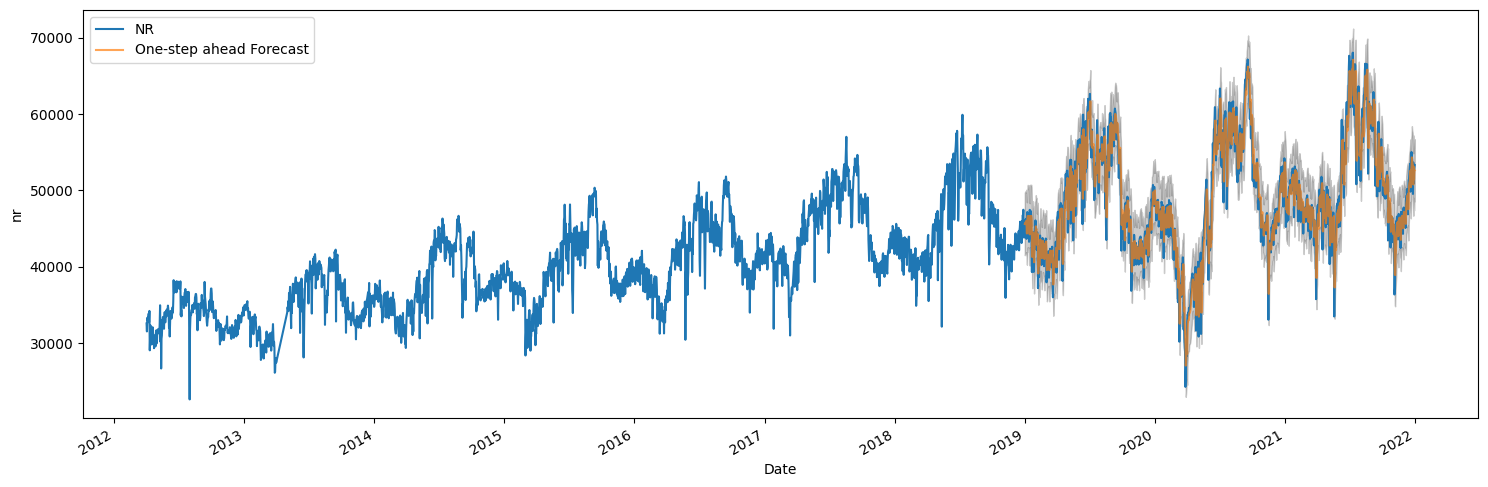

In [ ]:
ax = new_df['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('nr')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = new_df['2019-01-01':]['NR']
print(abs(y_forecasted-y_truth))


# Compute the mean square error
mae = (abs(y_forecasted - y_truth)).mean()
print('The absolute mean Error of our forecasts is {}'.format(round(mae, 2)))

Date
2019-01-01     121.807516
2019-01-02      30.492956
2019-01-03      45.035969
2019-01-04     637.809929
2019-01-05     540.076276
                 ...     
2021-12-27    2864.733970
2021-12-28    2204.859251
2021-12-29    1148.887200
2021-12-30     459.593338
2021-12-31     692.484145
Length: 1096, dtype: float64
The absolute mean Error of our forecasts is 1882.23


In [ ]:
# #training and test set

# training = new_df.iloc[:-31,:]
# test= new_df.iloc[:-31,:]

In [ ]:
#predections

# pred=pd.Series(model.predict(n_periods= len(test)))
# pred.index=test.index
# pred[:5]

In [ ]:
#visuivilse
# training['NR'].plot(figsize = (12,8),legend = True)

# test['NR'].plot(legend = True)
# pred.plot(legend= True)

In [ ]:

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cpu is available.


In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title):
    data = []

    value = go.Scatter(
        x=df.index,
        y=df.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [ ]:
df.head()

,Date,Days,NR,WR,SR,ER,NER,TOTAL
0,2012-04-01,2012-04-01,32607,34443,28350,12405,1458,109263
1,2012-04-02,2012-04-02,31560,36568,28913,13992,1539,112572
2,2012-04-03,2012-04-03,33345,36355,27958,13857,1549,113064
3,2012-04-04,2012-04-04,33026,36530,28956,13886,1530,113928
4,2012-04-05,2012-04-05,32982,35964,30468,13510,1532,114456


In [ ]:
# Assuming df is your DataFrame
df.drop(columns=['Days'], inplace=True)

In [ ]:
df = df.set_index(['Date'])
df = df.rename(columns={'NR': 'value'})

df.index = pd.to_datetime(df.index)
if not df.index.is_monotonic:
    df = df.sort_index()

plot_dataset(df, title='NORTH REGION (NR) Region: estimated energy consumption in Megawatts (MW)')


In [ ]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["value"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

input_dim = 100

df_timelags = generate_time_lags(df, input_dim)
df_timelags

,value,WR,SR,ER,NER,TOTAL,lag1,lag2,lag3,lag4,...,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-10,35658,32253,30306,14847,1734,114798,36106.0,33531.0,34329.0,33669.0,...,29091.0,34242.0,32764.0,33900.0,33484.0,32982.0,33026.0,33345.0,31560.0,32607.0
2012-07-11,35584,32254,29277,14669,1718,113502,35658.0,36106.0,33531.0,34329.0,...,30927.0,29091.0,34242.0,32764.0,33900.0,33484.0,32982.0,33026.0,33345.0,31560.0
2012-07-12,36042,32989,29519,13905,1652,114107,35584.0,35658.0,36106.0,33531.0,...,32349.0,30927.0,29091.0,34242.0,32764.0,33900.0,33484.0,32982.0,33026.0,33345.0
2012-07-13,35151,32653,29703,13958,1681,113146,36042.0,35584.0,35658.0,36106.0,...,29817.0,32349.0,30927.0,29091.0,34242.0,32764.0,33900.0,33484.0,32982.0,33026.0
2012-07-14,35612,32916,29343,13531,1629,113031,35151.0,36042.0,35584.0,35658.0,...,30515.0,29817.0,32349.0,30927.0,29091.0,34242.0,32764.0,33900.0,33484.0,32982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,53645,56279,40809,20271,2616,173620,49539.0,52359.0,53836.0,54410.0,...,55573.0,51759.0,52824.0,51728.0,49887.0,53527.0,57566.0,58983.0,57103.0,55042.0
2021-12-28,50901,51489,41619,18608,2625,165242,53645.0,49539.0,52359.0,53836.0,...,56715.0,55573.0,51759.0,52824.0,51728.0,49887.0,53527.0,57566.0,58983.0,57103.0
2021-12-29,52602,53180,41357,19097,2602,168838,50901.0,53645.0,49539.0,52359.0,...,55204.0,56715.0,55573.0,51759.0,52824.0,51728.0,49887.0,53527.0,57566.0,58983.0


In [ ]:
df_features = (
    df
    .assign(day = df.index.day)
    .assign(month = df.index.month)
    .assign(day_of_week = df.index.dayofweek)
    .assign(week_of_year = df.index.week)
)

def onehot_encode_pd(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)

    return df.drop(columns=cols)

df_features = onehot_encode_pd(df_features, ['month', 'day', 'day_of_week', 'week_of_year'])
print(df_features)

            value     WR     SR     ER   NER   TOTAL  month_1  month_2  \
Date                                                                     
2012-04-01  32607  34443  28350  12405  1458  109263        0        0   
2012-04-02  31560  36568  28913  13992  1539  112572        0        0   
2012-04-03  33345  36355  27958  13857  1549  113064        0        0   
2012-04-04  33026  36530  28956  13886  1530  113928        0        0   
2012-04-05  32982  35964  30468  13510  1532  114456        0        0   
...           ...    ...    ...    ...   ...     ...      ...      ...   
2021-12-27  53645  56279  40809  20271  2616  173620        0        0   
2021-12-28  50901  51489  41619  18608  2625  165242        0        0   
2021-12-29  52602  53180  41357  19097  2602  168838        0        0   
2021-12-30  53041  53733  40193  20052  2619  169638        0        0   
2021-12-31  53319  53267  39728  19650  2566  168530        0        0   

            month_3  month_4  ...  we

In [ ]:

def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)
             }
    return df.assign(**kwargs).drop(columns=[col_name])

#df_features = generate_cyclical_features(df_features, 'hour', 24, 0)
#df_features = generate_cyclical_features(df_features, 'day_of_week', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_0', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_1', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_2', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_3', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_4', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_5', 7, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week_6', 7, 0)

# df_features = generate_cyclical_features(df_features, 'month', 12, 1)
# df_features = generate_cyclical_features(df_features, 'week_of_year', 52, 0)

df_features

,value,WR,SR,ER,NER,TOTAL,month_1,month_2,month_3,month_4,...,sin_day_of_week_2,cos_day_of_week_2,sin_day_of_week_3,cos_day_of_week_3,sin_day_of_week_4,cos_day_of_week_4,sin_day_of_week_5,cos_day_of_week_5,sin_day_of_week_6,cos_day_of_week_6
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-01,32607,34443,28350,12405,1458,109263,0,0,0,1,...,0.000000,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.781831,0.62349
2012-04-02,31560,36568,28913,13992,1539,112572,0,0,0,1,...,0.000000,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000
2012-04-03,33345,36355,27958,13857,1549,113064,0,0,0,1,...,0.000000,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000
2012-04-04,33026,36530,28956,13886,1530,113928,0,0,0,1,...,0.781831,0.62349,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000
2012-04-05,32982,35964,30468,13510,1532,114456,0,0,0,1,...,0.000000,1.00000,0.781831,0.62349,0.000000,1.00000,0.0,1.0,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,53645,56279,40809,20271,2616,173620,0,0,0,0,...,0.000000,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000
2021-12-28,50901,51489,41619,18608,2625,165242,0,0,0,0,...,0.000000,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000
2021-12-29,52602,53180,41357,19097,2602,168838,0,0,0,0,...,0.781831,0.62349,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000


In [ ]:
from datetime import date
import holidays

# us_holidays = holidays.US()
IN_holidays = holidays.CountryHoliday('IN')
def is_holiday(date):
    date = date.replace(hour = 0)
    return 1 if (date in IN_holidays) else 0

def add_holiday_col(df, holidays):
    return df.assign(is_holiday = df.index.to_series().apply(is_holiday))


df_features = add_holiday_col(df_features, IN_holidays)
df_features

,value,WR,SR,ER,NER,TOTAL,month_1,month_2,month_3,month_4,...,cos_day_of_week_2,sin_day_of_week_3,cos_day_of_week_3,sin_day_of_week_4,cos_day_of_week_4,sin_day_of_week_5,cos_day_of_week_5,sin_day_of_week_6,cos_day_of_week_6,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-01,32607,34443,28350,12405,1458,109263,0,0,0,1,...,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.781831,0.62349,1
2012-04-02,31560,36568,28913,13992,1539,112572,0,0,0,1,...,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
2012-04-03,33345,36355,27958,13857,1549,113064,0,0,0,1,...,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
2012-04-04,33026,36530,28956,13886,1530,113928,0,0,0,1,...,0.62349,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
2012-04-05,32982,35964,30468,13510,1532,114456,0,0,0,1,...,1.00000,0.781831,0.62349,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,53645,56279,40809,20271,2616,173620,0,0,0,0,...,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
2021-12-28,50901,51489,41619,18608,2625,165242,0,0,0,0,...,1.00000,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0
2021-12-29,52602,53180,41357,19097,2602,168838,0,0,0,0,...,0.62349,0.000000,1.00000,0.000000,1.00000,0.0,1.0,0.000000,1.00000,0


In [ ]:
from sklearn.model_selection import train_test_split

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_features, 'value', 0.2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

In [ ]:
print(df.dtypes)


value    int64
WR       int64
SR       int64
ER       int64
NER      int64
TOTAL    int64
dtype: object


In [ ]:

scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)


In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates an RNN instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [ ]:
class LSTMModel(nn.Module):
    """LSTMModel class extends nn.Module class and works as a constructor for LSTMs.

       LSTMModel class initiates a LSTM module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of LSTMs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


In [ ]:
def get_model(model, model_params):
    models = {
        "rnn": RNNModel,
        "lstm": LSTMModel,
        # "gru": GRUModel,
    }
    return models.get(model.lower())(**model_params)


In [ ]:

class Optimization:
    """Optimization is a helper class that allows training, validation, prediction.

    Optimization is a helper class that takes model, loss function, optimizer function
    learning scheduler (optional), early stopping (optional) as inputs. In return, it
    provides a framework to train and validate the models, and to predict future values
    based on the models.

    Attributes:
        model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
        loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
        optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        train_losses (list[float]): The loss values from the training
        val_losses (list[float]): The loss values from the validation
        last_epoch (int): The number of epochs that the models is trained
    """
    def __init__(self, model, loss_fn, optimizer):
        """
        Args:
            model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
            loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
            optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        """
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []

    def train_step(self, x, y):
        """The method train_step completes one step of training.

        Given the features (x) and the target values (y) tensors, the method completes
        one step of the training. First, it activates the train mode to enable back prop.
        After generating predicted values (yhat) by doing forward propagation, it calculates
        the losses by using the loss function. Then, it computes the gradients by doing
        back propagation and updates the weights by calling step() function.

        Args:
            x (torch.Tensor): Tensor for features to train one step
            y (torch.Tensor): Tensor for target values to calculate losses

        """
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        """The method train performs the model training

        The method takes DataLoaders for training and validation datasets, batch size for
        mini-batch training, number of epochs to train, and number of features as inputs.
        Then, it carries out the training by iteratively calling the method train_step for
        n_epochs times. If early stopping is enabled, then it  checks the stopping condition
        to decide whether the training needs to halt before n_epochs steps. Finally, it saves
        the model in a designated file path.

        Args:
            train_loader (torch.utils.data.DataLoader): DataLoader that stores training data
            val_loader (torch.utils.data.DataLoader): DataLoader that stores validation data
            batch_size (int): Batch size for mini-batch training
            n_epochs (int): Number of epochs, i.e., train steps, to train
            n_features (int): Number of feature columns

        """
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        """The method evaluate performs the model evaluation

        The method takes DataLoaders for the test dataset, batch size for mini-batch testing,
        and number of features as inputs. Similar to the model validation, it iteratively
        predicts the target values and calculates losses. Then, it returns two lists that
        hold the predictions and the actual values.

        Note:
            This method assumes that the prediction from the previous step is available at
            the time of the prediction, and only does one-step prediction into the future.

        Args:
            test_loader (torch.utils.data.DataLoader): DataLoader that stores test data
            batch_size (int): Batch size for mini-batch training
            n_features (int): Number of feature columns

        Returns:
            list[float]: The values predicted by the model
            list[float]: The actual values in the test set.

        """
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                yhat=yhat.cpu().data.numpy()
                predictions.append(yhat)
                y_test=y_test.cpu().data.numpy()
                values.append(y_test)

        return predictions, values

    def plot_losses(self):
        """The method plots the calculated loss values for training and validation
        """
        plt.style.use('ggplot')
        plt.figure(figsize=(10,5))
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

In [ ]:
import torch.optim as optim
def General_Settings(model_name):

        input_dim = len(X_train.columns)
        output_dim = 1
        hidden_dim = 64
        layer_dim = 3
        batch_size = 64
        dropout = 0.2
        n_epochs = 20
        learning_rate = 1e-3
        weight_decay = 1e-6

        model_params = {'input_dim': input_dim,
                        'hidden_dim' : hidden_dim,
                        'layer_dim' : layer_dim,
                        'output_dim' : output_dim,
                        'dropout_prob' : dropout}
        model = get_model(model_name, model_params)
        loss_fn = nn.MSELoss(reduction="mean")
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        opt = Optimization(model=model.to(device), loss_fn=loss_fn, optimizer=optimizer)
        opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
        opt.plot_losses()

        predictions, values = opt.evaluate(
            test_loader_one,
            batch_size=1,
            n_features=input_dim
        )
        return predictions,values


In [ ]:

def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(df):
    result_metrics = {'mae' : mean_absolute_error(df.value, df.prediction),
                      'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
                      'r2' : r2_score(df.value, df.prediction)}

    print("Mean Absolute Error:       ", result_metrics["mae"])
    print("Root Mean Squared Error:   ", result_metrics["rmse"])
    print("R^2 Score:                 ", result_metrics["r2"])
    return result_metrics

In [ ]:
from sklearn.linear_model import LinearRegression

def build_baseline_model(df, test_ratio, target_col):
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, shuffle=False
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    result = pd.DataFrame(y_test)
    result["prediction"] = prediction
    result = result.sort_index()

    return result


In [ ]:

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
plt.style.use('ggplot')

def plot_predictions(df_result, df_baseline):
    data = []

    value = go.Scatter(
        x=df_result.index,
        y=df_result.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df_result.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    baseline = go.Scatter(
        x=df_baseline.index,
        y=df_baseline.prediction,
        mode="lines",
        line={"dash": "dot"},
        name='linear regression',
        marker=dict(),
        text=df_baseline.index,
        opacity=0.8,
    )
    data.append(baseline)

    prediction = go.Scatter(
        x=df_result.index,
        y=df_result.prediction,
        mode="lines",
        line={"dash": "dot"},
        name='predictions',
        marker=dict(),
        text=df_result.index,
        opacity=0.8,
    )
    data.append(prediction)

    layout = dict(
        title="Predictions vs Actual Values for the dataset",
        xaxis=dict(title="Time", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = go.Figure(data=data, layout=layout)
    fig.show()


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

[1/20] Training loss: 0.0173	 Validation loss: 0.0197
[2/20] Training loss: 0.0364	 Validation loss: 0.0208
[3/20] Training loss: 0.0346	 Validation loss: 0.0213
[4/20] Training loss: 0.0394	 Validation loss: 0.0196
[5/20] Training loss: 0.0381	 Validation loss: 0.0193
[6/20] Training loss: 0.0331	 Validation loss: 0.0207
[7/20] Training loss: 0.0251	 Validation loss: 0.0171
[8/20] Training loss: 0.0191	 Validation loss: 0.0125
[9/20] Training loss: 0.0162	 Validation loss: 0.0119
[10/20] Training loss: 0.0136	 Validation loss: 0.0118


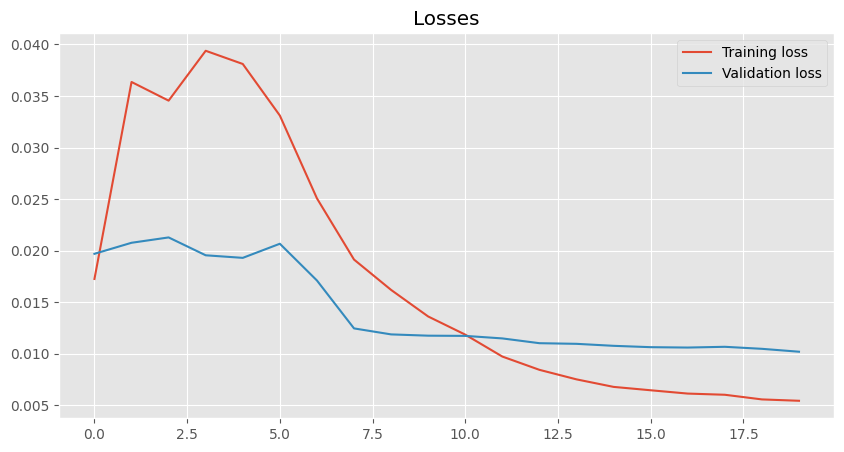

Mean Absolute Error:        3534.5728
Root Mean Squared Error:    4763.943324599905
R^2 Score:                  0.6328978389051225
{'mae': 3534.5728, 'rmse': 4763.943324599905, 'r2': 0.6328978389051225}
            value    prediction
Date                           
2020-01-25  47883  47884.701678
2020-01-26  41153  41154.008831
2020-01-27  46236  46208.298377
2020-01-28  46223  46191.710555
2020-01-29  45376  45349.994254
...           ...           ...
2021-12-27  53645  53632.182322
2021-12-28  50901  50882.305104
2021-12-29  52602  52586.064313
2021-12-30  53041  53029.192286
2021-12-31  53319  53412.664611

[707 rows x 2 columns]
Mean Absolute Error:        16.054942273376497
Root Mean Squared Error:    26.11049765563708
R^2 Score:                  0.9999889723213011
{'mae': 16.054942273376497, 'rmse': 26.11049765563708, 'r2': 0.9999889723213011}


In [ ]:
# model_name=Enter model name 'lstm','rnn','gru'
model_name='rnn'
predictions, values=General_Settings(model_name)
df_result=format_predictions(predictions, values, X_test, scaler)
print(calculate_metrics(df_result))
df_baseline = build_baseline_model(df_features, 0.2, 'value')
print(df_baseline)
print(calculate_metrics(df_baseline))
plot_predictions(df_result, df_baseline)

[1/20] Training loss: 0.0586	 Validation loss: 0.0283
[2/20] Training loss: 0.0550	 Validation loss: 0.0847
[3/20] Training loss: 0.0242	 Validation loss: 0.0460
[4/20] Training loss: 0.0318	 Validation loss: 0.0505
[5/20] Training loss: 0.0279	 Validation loss: 0.0430
[6/20] Training loss: 0.0266	 Validation loss: 0.0369
[7/20] Training loss: 0.0248	 Validation loss: 0.0289
[8/20] Training loss: 0.0231	 Validation loss: 0.0214
[9/20] Training loss: 0.0204	 Validation loss: 0.0142
[10/20] Training loss: 0.0179	 Validation loss: 0.0104


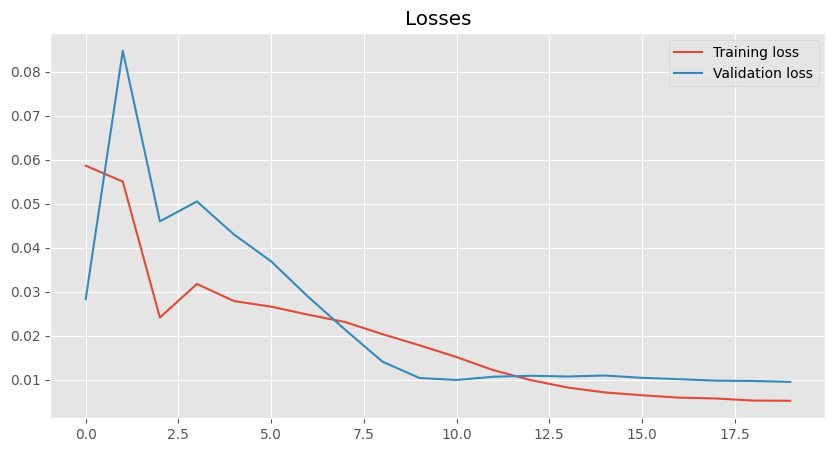

Mean Absolute Error:        3116.297
Root Mean Squared Error:    4115.224416723831
R^2 Score:                  0.7260692118408264
{'mae': 3116.297, 'rmse': 4115.224416723831, 'r2': 0.7260692118408264}
Mean Absolute Error:        16.054942273376497
Root Mean Squared Error:    26.11049765563708
R^2 Score:                  0.9999889723213011
{'mae': 16.054942273376497, 'rmse': 26.11049765563708, 'r2': 0.9999889723213011}


In [ ]:

# model_name=Enter model name 'lstm','rnn','gru'
model_name='lstm'
predictions, values=General_Settings(model_name)
df_result=format_predictions(predictions, values, X_test, scaler)
print(calculate_metrics(df_result))
df_baseline = build_baseline_model(df_features, 0.2, 'value')
print(calculate_metrics(df_baseline))
plot_predictions(df_result, df_baseline)